<h1 style="text-align: center;">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY Project #2</div>
<span style="">Project #2: You and Data Science</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/guides/Course-Projects/You-and-Data-Science/">https://discovery.cs.illinois.edu/guides/Course-Projects/You-and-Data-Science/</a></div>
</h1>

<hr style="color: #DD3403;">

# Section 1: Dataset
In Markdown, explain what dataset you chose and why you chose it. Include why is it meaningful to you and how you went about finding it. Then, in Python, load your dataset into a DataFrame.

The dataset I am working with is one that I made myself. Astrophotography is a hobby of mine, it is taking pictures of deep space objects like galaxies, nebulae, and star clusters. I compiled the data from two sources: log files from the image capture software I use, and from an iOS app that I developed and released over the past year. The log files contain information such as the date, what time I setup and took down the equipment, and what time I started and stopped taking pictures at. The app I created contains information about different deep sky targets and includes a statistic called visibility score and season score which are calculated based on the target's coordinates, your location, and the date. Those statistics for each night listed are included in the dataframe. Additionally I used Apple's WeatherKit API to fetch a few different weather statisitics about each night. I have been doing astrophotography since 2020, but I only have adequate data for this project back to 2022. In my iOS app, I am working on creating a system to catalog each night of imaging and store all the information used in this project and even more. I had hoped to be able to do more with this project, but I wasn't able to get the data together in time, so I had to go with a smaller dataset than I wanted.



In [107]:
# import pandas
import pandas as pd

# load the data into a dataframe
df = pd.read_csv("journal.csv")

In [108]:
import datetime

# convert all date strings into date objects
df["date"] = df["dateString"].map(lambda x: datetime.datetime.fromisoformat(x))
df["setupStart"] = df["setupStartString"].map(lambda x: datetime.datetime.fromisoformat(x))
df["setupEnd"] = df["setupEndString"].map(lambda x: datetime.datetime.fromisoformat(x))
df["imageStart"] = df["imageStartString"].map(lambda x: datetime.datetime.fromisoformat(x))
df["imageEnd"] = df["imageEndString"].map(lambda x: datetime.datetime.fromisoformat(x))

df["month"] = df["date"].map(lambda x: x.month)
df["year"] = df["date"].map(lambda x: x.year)


In [109]:
# remove unwanted columns from the dataframe
columns = ["weather/dewPoint","weather/wind","weather/tempF","weather/cloudCover","weather/moonIllumination","totalExposureCount","imageEnd","imageStart","setupEnd","setupStart","visibilityScore","seasonScore","gear","targetType","targetName","year","month","date"]
columns.reverse()
df = df[columns]
df

,date,month,year,targetName,targetType,gear,seasonScore,visibilityScore,setupStart,setupEnd,imageStart,imageEnd,totalExposureCount,weather/moonIllumination,weather/cloudCover,weather/tempF,weather/wind,weather/dewPoint
0,2022-06-03,6,2022,Pinwheel Galaxy,barredSpiralGalaxy,celestron6SE,0.771,1.000,2022-06-03 21:02:39,2022-06-04 09:54:11,2022-06-03 22:01:55,2022-06-04 04:04:57,48,0.205835,0.018333,55.166000,1.083258,42.137000
1,2022-06-17,6,2022,Pinwheel Galaxy,spiralGalaxy,celestron6SE,0.691,1.000,2022-06-17 20:56:46,2022-06-18 09:40:21,2022-06-17 21:59:11,2022-06-18 02:05:55,30,0.867166,0.054000,67.578800,3.581586,52.228400
2,2022-08-01,8,2022,Iris Nebula,reflectionNebula,celestron6SE,0.982,1.000,2022-08-01 20:32:14,2022-08-02 07:00:46,2022-08-01 22:56:57,2022-08-02 01:20:43,23,0.200655,0.010000,70.178000,1.035619,64.238000
3,2022-08-30,8,2022,Andromeda Galaxy,barredSpiralGalaxy,zenithstar61,0.826,1.000,2022-08-30 20:20:19,2022-08-31 05:51:27,2022-08-30 20:52:27,2022-08-31 05:47:28,96,0.157898,0.003333,62.000000,1.553429,55.894000
4,2022-08-31,8,2022,Andromeda Galaxy,barredSpiralGalaxy,zenithstar61,0.830,1.000,2022-08-31 20:12:14,2022-09-01 06:41:25,2022-08-31 20:41:51,2022-09-01 05:55:52,96,0.241608,0.004444,68.364000,1.478865,63.490000
5,2022-09-29,9,2022,Andromeda Galaxy,barredSpiralGalaxy,zenithstar61,0.974,1.000,2022-09-29 20:14:26,2022-09-30 06:52:39,2022-09-29 20:34:16,2022-09-30 06:17:23,105,0.195525,0.232000,46.796000,0.866192,43.428200
6,2022-09-30,9,2022,Andromeda Galaxy,barredSpiralGalaxy,zenithstar61,0.980,1.000,2022-09-30 19:36:33,2022-10-01 07:14:17,2022-09-30 19:52:37,2022-10-01 06:22:59,114,0.285080,0.083636,49.577818,1.220148,45.891091
7,2022-10-01,10,2022,Andromeda Galaxy,barredSpiralGalaxy,zenithstar61,0.986,1.000,2022-10-01 20:42:05,2022-10-02 10:18:00,2022-10-01 20:47:52,2022-10-02 06:29:49,108,0.384117,0.059000,51.920600,1.731142,48.543800
8,2022-10-02,10,2022,Cygnus Loop,supernovaRemnant,zenithstar61,0.687,0.741,2022-10-02 19:04:12,2022-10-03 06:38:07,2022-10-02 19:39:51,2022-10-03 00:11:00,48,0.488265,0.004000,52.750400,1.610595,46.605200
9,2022-10-03,10,2022,Cygnus Loop,supernovaRemnant,zenithstar61,0.685,0.734,2022-10-03 19:23:14,2022-10-04 18:26:28,2022-10-03 19:40:37,2022-10-04 03:04:16,48,0.592931,0.073750,48.893000,0.841182,42.908000


# Section 2: Exploratory Data Analysis
In Markdown, explain what descriptive statistics can help you give a broad overview of the data (ex: size, shape, interesting descriptive statistics, etc.). In Python, do this exploratory data analysis. Reference Labs: lab_intro, lab_pandas, lab_exp_design, lab_simpsons_paradox.

### Calculating the Imaging Duration

I have start and end times for imaging, but it is more useful to look at the duration, so I will add a new column called "imagingDuration"

In [110]:
# Create the new column
df["imagingDuration"] = 0

# Fill the new column
for i in range(len(df["imagingDuration"])):
    delta = df["imageEnd"][i] - df["imageStart"][i]
    df["imagingDuration"][i] = delta.seconds/60/60

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_22261/2239204963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["imagingDuration"][i] = delta.seconds/60/60


### Calculating the Difference in Temperature and Dew Point

Something else I am interested is the difference between temperature and dew point each night. According to google, "The dew point is the temperature to which the air must cool for it to become completely saturated with water. If the air continues to cool lower than the dew point, airborne water will begin to condense in the form of dew." Dew forming on the telescope is a common problem that I have, so I want to investigate it further.

In [111]:
# Create a new column containing the difference between the temperature and dew point
df["tempDewPointDiff"] = df["weather/tempF"] - df["weather/dewPoint"]

### Looking at Descriptive Statistics

Descriptive statistics such as mean, median, min, max, and standard deviation can provide insights into the data. The mean and median can give you an idea of the center of the data as well as indicate if their are significant outliers. The min and max can also indicate significant outliers. The standard deviation is good for seeing how much the data varies.

In [112]:
df.describe()

,date,month,year,seasonScore,visibilityScore,setupStart,setupEnd,imageStart,imageEnd,totalExposureCount,weather/moonIllumination,weather/cloudCover,weather/tempF,weather/wind,weather/dewPoint,imagingDuration,tempDewPointDiff
count,20,20.000000,20.000000,20.000000,20.000000,20,20,20,20,20.0000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2022-12-21 06:00:00,8.650000,2022.300000,0.813350,0.869650,2022-12-22 01:48:36.400000256,2022-12-22 13:30:33.050000128,2022-12-22 02:34:35.650000128,2022-12-22 09:23:15.949999616,68.5500,0.369198,0.054428,54.242671,2.217649,45.456381,6.811194,8.786290
min,2022-06-03 00:00:00,3.000000,2022.000000,0.431000,0.000000,2022-06-03 21:02:39,2022-06-04 09:54:11,2022-06-03 22:01:55,2022-06-04 04:04:57,12.0000,0.001454,0.000000,29.324750,0.546807,18.027500,1.175556,3.367800
25%,2022-09-21 18:00:00,8.000000,2022.000000,0.692500,0.955500,2022-09-22 14:13:53,2022-09-23 00:49:50.500000,2022-09-22 14:36:09.750000128,2022-09-23 00:12:00.249999872,28.5000,0.135411,0.008611,47.808500,1.110514,39.886250,4.119514,5.850000
50%,2022-10-06 12:00:00,9.000000,2022.000000,0.828000,1.000000,2022-10-07 07:12:44.500000,2022-10-08 00:35:47.500000,2022-10-07 07:38:50,2022-10-07 12:29:27.500000,80.5000,0.262849,0.031667,53.958200,1.564303,46.258475,7.571250,7.198773
75%,2023-03-25 00:00:00,10.000000,2023.000000,0.953750,1.000000,2023-03-25 19:48:13.750000128,2023-03-26 06:01:52.750000128,2023-03-25 20:34:58,2023-03-26 04:08:40.249999872,98.2500,0.540986,0.063437,64.036420,3.238356,52.635527,9.350000,11.739750
max,2023-11-13 00:00:00,11.000000,2023.000000,0.992000,1.000000,2023-11-13 19:14:50,2023-11-14 00:06:36,2023-11-13 19:33:10,2023-11-13 23:40:29,120.0000,0.998016,0.232000,73.539500,5.490101,67.959500,11.323889,18.285750
std,NaN,2.300458,0.470162,0.157571,0.296557,NaN,NaN,NaN,NaN,37.3553,0.329531,0.065794,12.297516,1.509641,13.220539,3.277607,4.440136


I notice that the mean visibility score is 86% and the median is 100%. This is due to an outlier warping the mean, so the median is probably a better measure of center in this case. It makes sense that I would have imaged targets with high visibility scores. The mean season score is 81% and the median is 82%; they are very similar. I can see that the median date is 10/6/2022, so half of the data is from before that date and half is from after. Most of the information in this table doesn't really tell me much. Most of the columns vary with the time of year, like start and end times and the weather, so mean and median don't offer much insight. If I had a bigger dataset, I could stratify by month, and see if that offers anything of interest.

# Section 3: Exploratory Data Visualization
In Python, create at least one data visualization. This does not need to be complex, but should showcase something about your EDA or Data Science analysis. In Markdown, provide at least a two sentence summary of this result. Reference Labs: lab_plots, lab_gpa.

### Plotting Season Score vs Visibility Score

<Axes: xlabel='seasonScore', ylabel='visibilityScore'>

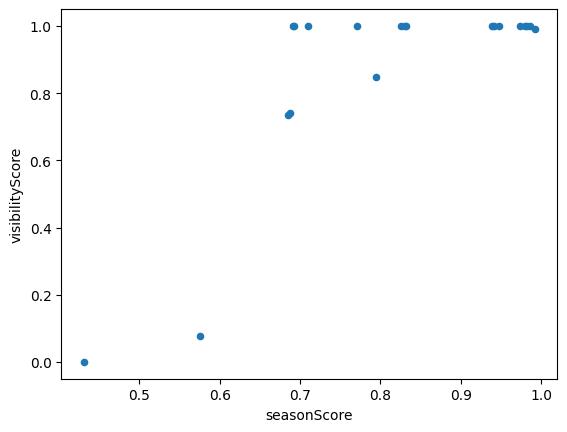

In [113]:
df.plot.scatter(x="seasonScore",y="visibilityScore")

The season score and visibility score values were computed with an algorithm I created. Visibility score is the percentage of the night that the target was above the horizon for. Season score is a measure of how close the date the target was imaged is to the most optimal night to image the target on. The scatterplot indicates a positive correlation between seasonScore and visibilityScore which makes sense. A higher visibility score is linked to two factors, one being if the target is in season, and the other is its declination (an objective coordinate).

### Plotting Date vs Imaging Duration

<Axes: xlabel='date', ylabel='imagingDuration'>

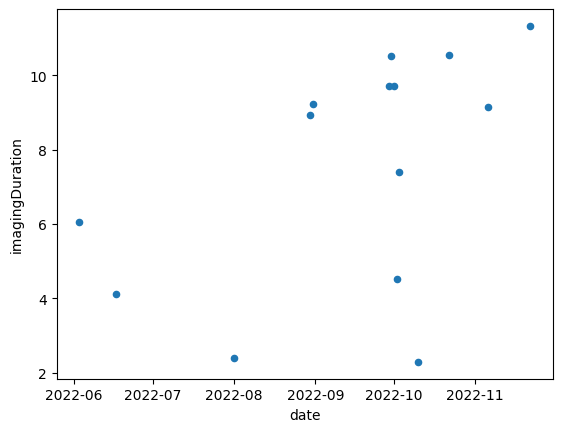

In [114]:
df2022 = df[(df.year == 2022)]
df2022.plot.scatter(x="date", y="imagingDuration")

This scatter plot shows a positive correlation, indicating that the date affects imaging duration. This makes sense because from June to December, the nights get longer, meaning there is more time that can be spent taking pictures each night.

# Section 4: Data Science
In Markdown, explain at least one question you have about your dataset. Clearly state the questions you have and how you plan on using Python to answer them. This may involve cleaning or selecting a subset of the data. You can use any technique you learned in DISCOVERY that is beyond simple descriptive statistics. You can use regression, hypothesis testing, correlation, simulation, or ideas from any of the labs, MicroProjects, or lecture. In Python, do the data science! :) Reference Labs: lab_favorites, lab_similarity, lab_justice, lab_probability, lab_random_variable, lab_hypothesis_tests, lab_regression, lab_kmeans.

### My Question

How is the difference between temperature and dew point correlated to the total exposure count?

I plan on calculating the correlation coefficient, and then using that to calculate the slope of a regression line that could be used to predict the total exposure count.

In [115]:
df2022.corr(numeric_only=True)


,month,year,seasonScore,visibilityScore,totalExposureCount,weather/moonIllumination,weather/cloudCover,weather/tempF,weather/wind,weather/dewPoint,imagingDuration,tempDewPointDiff
month,1.000000,NaN,0.079623,-0.323290,0.414146,0.092739,0.087538,-0.625977,0.045129,-0.490352,0.372098,-0.421117
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasonScore,0.079623,NaN,1.000000,0.811796,0.681100,-0.752323,0.195826,-0.186505,-0.014860,-0.052028,0.644853,-0.397886
visibilityScore,-0.323290,NaN,0.811796,1.000000,0.489477,-0.643284,0.018533,0.031976,0.103849,0.039228,0.530396,-0.019553
totalExposureCount,0.414146,NaN,0.681100,0.489477,1.000000,-0.510563,0.231362,-0.466707,0.113257,-0.332378,0.967560,-0.410150
weather/moonIllumination,0.092739,NaN,-0.752323,-0.643284,-0.510563,1.000000,-0.004984,0.035389,0.144921,-0.102613,-0.505421,0.401246
weather/cloudCover,0.087538,NaN,0.195826,0.018533,0.231362,-0.004984,1.000000,-0.246139,-0.075071,-0.154410,0.243837,-0.276792
weather/tempF,-0.625977,NaN,-0.186505,0.031976,-0.466707,0.035389,-0.246139,1.000000,0.315526,0.941418,-0.494758,0.214953
weather/wind,0.045129,NaN,-0.014860,0.103849,0.113257,0.144921,-0.075071,0.315526,1.000000,0.127173,0.119417,0.559748
weather/dewPoint,-0.490352,NaN,-0.052028,0.039228,-0.332378,-0.102613,-0.154410,0.941418,0.127173,1.000000,-0.389164,-0.126998


In [116]:
# The r value from the correlation coefficient chart
r = -0.332378

# Calculating the slope using the formula r*SDy/SDx
slope = r * df["totalExposureCount"].std() / df["tempDewPointDiff"].std()
slope

-2.7963288134412956

According to this model, for every 1 degree increase in the difference between the temperature and the dew point, the total exposure count will decrease by 2.79 images

I think I should note that this relationship is completely bogus and is an example of lying with statistics. The real relationship should have a positive correlation because if it is more likely for dew to form (i.e. lower difference), then there should be less exposures because the dew will have ruined many. This happened because of bad data.

<Axes: xlabel='tempDewPointDiff', ylabel='totalExposureCount'>

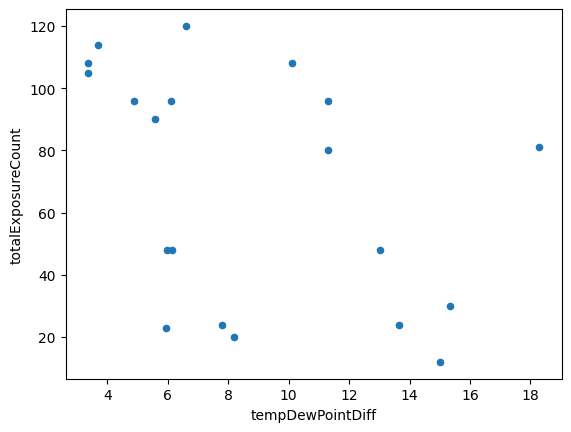

In [117]:
# Visualizing the slope
df.plot.scatter(x="tempDewPointDiff",y="totalExposureCount")

# Section 5: Overall Summary
In Markdown, summarize your dataset, findings, and visualization. A good summary shares a complete overview of your work in only 1-2 paragraphs without going low-level into the code. This might be the summary you would share in a future interview if someone asked you about "what is a data science project you did on your own?". Make sure to include at least 1-2 paragraphs for your summary (a paragraph is at least 5 sentences).

I analyzed a dataset pertaining to my hobby of astrophotography. The dataset contains information such as dates and times, weather, and scores indicating the quality of the target. The dataset contains this information for 20 different nights from June 2022 to November 2023. I looked at a broad overview of various descriptive statistics including mean and median. From this I reaffirmed existing facts that I knew to be true, but most of the descriptive statistics didn't mean much in context. I visualized the relationship between season score and visibility score with a scatter plot, which, again, simply reinforced what I already knew to be true: they are linked to one another. I made another visualization plotting the last six months of 2022 agains the imaging duration. This indcated that as the second half of the year progressed, the imaging duration increased, which is due to the increasing length of the night as the months progress. My findings from exploring this dataset overwhelmingly tell me that this is a bad dataset, and that it is very difficult to draw useful conclusions from it. There is not enough samples, and the quality of the data is not excellent. Orginally analyzing this data seemed like a good idea because using data about something I care about would make me invested in this project, but it is what it is. I plan to build up this dataset further and then do some more data science on it in the future.